In [1]:
from urllib.request import urlopen
import json
year = input("請輸入年份： ")
time = 1
while time < 13:    
    month = str(time)
    url = "https://www.google.com/doodles/json/" + year + "/" + month + "?hl=zh_TW"    
    response = urlopen(url)
    #print(response.read()), read()消耗型函數
    doodles = json.load(response)
    
    time = time + 1
    # doodles=> List, d=> Dict.
    for d in doodles:
        url = "https:" + d["url"]    
        print(d["title"], url)
        # print(url.split("/")[-1]) #產生一個 list，透過[-1]抓最後一個
        fname = "doodles/" + url.split("/")[-1]

        
        # 針對圖片做處理，並儲存檔案
        response = urlopen(url)
        # print(response.read())
        img = response.read()     
        
        # 存檔三部曲,1.打開
        f = open(fname, "wb")    
        f.write(img)
        f.close()

請輸入年份： 2020
India Republic Day 2020 https://www.google.com/logos/doodles/2020/india-republic-day-2020-6753651837108276-l.png
2020 年澳洲國慶日 https://www.google.com/logos/doodles/2020/australia-day-2020-6753651837108275.2-l.png
2020 年農曆新年 (越南) https://www.google.com/logos/doodles/2020/lunar-new-year-2020-vietnam-6753651837108271.2-l.png
Lunar New Year 2020 (Multiple Countries) https://www.google.com/logos/doodles/2020/lunar-new-year-2020-multiple-countries-6753651837108273.2-l.png
2020 年農曆新年 (南韓) https://www.google.com/logos/doodles/2020/lunar-new-year-2020-south-korea-6753651837108272.2-l.png
路易斯阿爾貝托斯賓奈塔 70 歲冥誕 https://www.google.com/logos/doodles/2020/luis-alberto-spinettas-70th-birthday-6753651837108268.2-law.gif
2020 年祖父節 (波蘭) https://www.google.com/logos/doodles/2020/grandfathers-day-2020-poland-6753651837108266-l.png
紀念「Sawaddee」 https://www.google.com/logos/doodles/2020/celebrating-sawaddee-6753651837108265-law.gif
紀念黃柳霜 https://www.google.com/logos/doodles/2020/celebrating-anna-may-

In [ ]:
from urllib.request import urlopen, urlretrieve
import json
import os
year = input("請輸入年份： ")

for m in range(12):  
    month = str(m + 1)
    url = "https://www.google.com/doodles/json/" + year + "/" + month + "?hl=zh_TW"    
    print("現在處理" + year + "月份: ", month)
    response = urlopen(url)
    #print(response.read()), read()消耗型函數
    doodles = json.load(response)
    
  
    # doodles=> List, d=> Dict.
    for d in doodles:
        url = "https:" + d["url"]    
        print(d["title"], url)
        # print(url.split("/")[-1]) #產生一個 list，透過[-1]抓最後一個
        dirname1 = "doodles/" + year + "/"
        if not os.path.exists(dirname1):
            os.mkdir(dirname1)
        dirname2 = dirname1 + month + "/"
        if not os.path.exists(dirname2):
            os.mkdir(dirname2)
        
        fname = dirname2 + url.split("/")[-1]
        urlretrieve(url, fname)

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

page = 51
while True:    
    url = "https://tabelog.com/tw/tokyo/rstLst/" + str(page) + "/?Srt=rt"
    print("資料擷取中：", page )
    try:
        response = urlopen(url)
    except:
        print("資料擷取異常")
        break
        
    html = BeautifulSoup(response)
    # print(html)
    # find()僅一個答案，find_all()回傳list
    # html.find_all('li', {'class':'list-rst'})

    for htmltag in html.find_all('li', class_ = 'list-rst'):    
        ja = htmltag.find('small', class_ = 'list-rst__name-ja')
        en = htmltag.find('a', class_ = 'list-rst__name-main')
        ratings = htmltag.find_all('b', class_ = 'c-rating__val')    
        print(ratings[0].text, ja.text, en.text, en["href"])

    page += 1

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

page = 51
while True:    
    url = "https://tabelog.com/tw/tokyo/rstLst/" + str(page) + "/?Srt=rt"
    print("資料擷取頁數：", page )
    try:
        response = urlopen(url)
    except:
        print("資料擷取異常")
        break
        
    html = BeautifulSoup(response)
    # print(html)
    # find()僅一個答案，find_all()回傳list
    # html.find_all('li', {'class':'list-rst'})

    for htmltag in html.find_all('li', class_ = 'list-rst'):    
        ja = htmltag.find('small', class_ = 'list-rst__name-ja')
        en = htmltag.find('a', class_ = 'list-rst__name-main')
        ratings = htmltag.find_all('b', class_ = 'c-rating__val')    
        print(ratings[0].text, ja.text, en.text, en["href"])

    page += 1

In [2]:
import pandas as pd
df = pd.read_csv("ted_main.csv", encoding = "utf-8")
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [3]:
df["comments"]

0       4553
1        265
2        124
3        200
4        593
        ... 
2545      17
2546       6
2547      10
2548      32
2549       8
Name: comments, Length: 2550, dtype: int64

In [4]:
df[["description","comments"]]

,description,comments
0,Sir Ken Robinson makes an entertaining and pro...,4553
1,With the same humor and humanity he exuded in ...,265
2,New York Times columnist David Pogue takes aim...,124
3,"In an emotionally charged talk, MacArthur-winn...",200
4,You've never seen data presented like this. Wi...,593
...,...,...
2545,"Between 2008 and 2016, the United States depor...",17
2546,How can you study Mars without a spaceship? He...,6
2547,Science fiction visions of the future show us ...,10
2548,In an unmissable talk about race and politics ...,32


In [5]:
df.T.to_csv("ted_transpose.csv", encoding="utf-8")

In [6]:
df.head(5)
df.tail(5)
df.iloc[2545]
df.iloc[991:1001][["description","comments","film_date"]]

,description,comments,film_date
991,Many of us have a social media presence -- a v...,189,1310342400
992,What if every light bulb in the world could al...,375,1310515200
993,Biologist Mark Pagel shares an intriguing theo...,405,1310515200
994,Should we keep the outdoors out of hospitals? ...,75,1310601600
995,"Psychologist Philip Zimbardo asks, ""Why are bo...",656,1298937600
996,"Poet, writer, activist Eve Ensler lived in her...",300,1291420800
997,How can cities help save the future? Alex Stef...,131,1310428800
998,"The world's largest volunteer animal rescue, s...",82,1309219200
999,Here's a crazy idea: Persuade the world to try...,311,1310688000
1000,How do we find planets -- even habitable plane...,131,1310342400


In [7]:
from datetime import datetime
str(datetime.utcfromtimestamp(1310342400))


'2011-07-11 00:00:00'

In [8]:
def timetrans(s):
    return str(datetime.utcfromtimestamp(s))

# apply=> apply(流程名字)，修改每一筆資料
df["film_UTC"] = df['film_date'].apply(timetrans)
df[["description","film_date","film_UTC"]]

,description,film_date,film_UTC
0,Sir Ken Robinson makes an entertaining and pro...,1140825600,2006-02-25 00:00:00
1,With the same humor and humanity he exuded in ...,1140825600,2006-02-25 00:00:00
2,New York Times columnist David Pogue takes aim...,1140739200,2006-02-24 00:00:00
3,"In an emotionally charged talk, MacArthur-winn...",1140912000,2006-02-26 00:00:00
4,You've never seen data presented like this. Wi...,1140566400,2006-02-22 00:00:00
...,...,...,...
2545,"Between 2008 and 2016, the United States depor...",1496707200,2017-06-06 00:00:00
2546,How can you study Mars without a spaceship? He...,1492992000,2017-04-24 00:00:00
2547,Science fiction visions of the future show us ...,1492992000,2017-04-24 00:00:00
2548,In an unmissable talk about race and politics ...,1499472000,2017-07-08 00:00:00


In [9]:
# Filter, 原理： df[[跟列數一樣多的]]
def timetrans(s):
    return str(datetime.utcfromtimestamp(s))

# apply=> apply(流程名字)，修改每一筆資料
df["film_UTC"] = df['film_date'].apply(timetrans)
df[["description","film_date","film_UTC"]]
df.head(3)[[True,True,True]]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_UTC
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25 00:00:00
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25 00:00:00
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24 00:00:00


In [10]:
# filter：True、False
def filter_flow(n):
    if n > 1000 and n <4000:
        return True
    else:
        return False
    
result = df["comments"].apply(filter_flow)
df[result]
    

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_UTC
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883,2008-02-27 00:00:00
381,1604,Elizabeth Gilbert muses on the impossible thin...,1149,TED2009,1233792000,49,Elizabeth Gilbert,Elizabeth Gilbert: Your elusive creative genius,1,1234141200,"[{'id': 1, 'name': 'Beautiful', 'count': 4027}...","[{'id': 250, 'hero': 'https://pe.tedcdn.com/im...",Writer,"['creativity', 'culture', 'entertainment', 'pe...",Your elusive creative genius,https://www.ted.com/talks/elizabeth_gilbert_on...,13155478,2009-02-05 00:00:00
500,1094,Career analyst Dan Pink examines the puzzle of...,1116,TEDGlobal 2009,1248393600,44,Dan Pink,Dan Pink: The puzzle of motivation,1,1251075600,"[{'id': 22, 'name': 'Fascinating', 'count': 38...","[{'id': 548, 'hero': 'https://pe.tedcdn.com/im...",Career analyst,"['brain', 'business', 'creativity', 'motivatio...",The puzzle of motivation,https://www.ted.com/talks/dan_pink_on_motivati...,18830983,2009-07-24 00:00:00
530,1155,"Our lives, our cultures, are composed of many ...",1129,TEDGlobal 2009,1248307200,46,Chimamanda Ngozi Adichie,Chimamanda Ngozi Adichie: The danger of a sing...,1,1254877200,"[{'id': 1, 'name': 'Beautiful', 'count': 5607}...","[{'id': 159, 'hero': 'https://pe.tedcdn.com/im...",Novelist,"['Africa', 'books', 'culture', 'identity', 'st...",The danger of a single story,https://www.ted.com/talks/chimamanda_adichie_t...,13298341,2009-07-23 00:00:00
553,1329,"At TEDIndia, Pranav Mistry demos several tools...",830,TEDIndia 2009,1257379200,42,Pranav Mistry,Pranav Mistry: The thrilling potential of Sixt...,1,1258333200,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 8...","[{'id': 481, 'hero': 'https://pe.tedcdn.com/im...","Director of research, Samsung Research America","['demo', 'design', 'open-source', 'technology']",The thrilling potential of SixthSense technology,https://www.ted.com/talks/pranav_mistry_the_th...,16097077,2009-11-05 00:00:00
614,1137,Sharing powerful stories from his anti-obesity...,1313,TED2010,1266624000,49,Jamie Oliver,Jamie Oliver: Teach every child about food,1,1265902560,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 10, 'hero': 'https://pe.tedcdn.com/ima...","Chef, activist","['business', 'education', 'food', 'global issu...",Teach every child about food,https://www.ted.com/talks/jamie_oliver\n,7638978,2010-02-20 00:00:00
641,1309,Games like World of Warcraft give players the ...,1203,TED2010,1265932800,34,Jane McGonigal,Jane McGonigal: Gaming can make a better world,1,1268816460,"[{'id': 22, 'name': 'Fascinating', 'count': 15...","[{'id': 146, 'hero': 'https://pe.tedcdn.com/im...",Game Designer,"['computers', 'design', 'entertainment', 'gami...",Gaming can make a better world,https://www.ted.com/talks/jane_mcgonigal_gamin...,4573252,2010-02-12 00:00:00
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437,2010-02-11 00:00:00
661,2272,"Vaccine-autism claims, ""Frankenfood"" bans, the...",1141,TED2010,1265846400,31,Michael Specter,Michael Specter: The danger of science denial,1,1271065080,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn

In [11]:
# eval()：查資料...

(array([1.39e+02, 1.73e+02, 1.21e+03, 8.53e+02, 1.50e+02, 1.80e+01,
        6.00e+00, 1.00e+00, 0.00e+00, 0.00e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

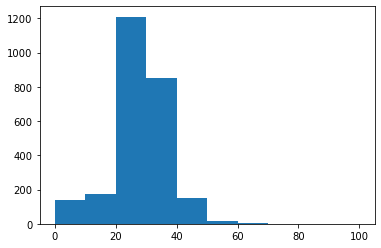

In [21]:
import matplotlib.pyplot as plt
plt.hist(df["languages"], range=(0, 100), bins=10)


In [27]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import pandas as pd

df = pd.DataFrame(columns=["評分","日文名稱","英文名稱","URL"])
page = 51
while True:    
    url = "https://tabelog.com/tw/tokyo/rstLst/" + str(page) + "/?Srt=rt"
    print("資料擷取頁數：", page )
    try:
        response = urlopen(url)
    except:
        print("資料擷取異常")
        break
        
    html = BeautifulSoup(response)
    # print(html)
    # find()僅一個答案，find_all()回傳list
    # html.find_all('li', {'class':'list-rst'})

    for htmltag in html.find_all('li', class_ = 'list-rst'):    
        ja = htmltag.find('small', class_ = 'list-rst__name-ja')
        en = htmltag.find('a', class_ = 'list-rst__name-main')
        ratings = htmltag.find_all('b', class_ = 'c-rating__val')    
        #print(ratings[0].text, ja.text, en.text, en["href"])
        
        #產生DataFrame Series Data
        s = pd.Series([ratings[0].text, ja.text, en.text, en["href"]], 
                  index=["評分","日文名稱","英文名稱","URL"])
        df = df.append(s, ignore_index = True)

    page += 1
    
df.to_csv("tabelog.csv", encoding="utf-8", index=False)

資料擷取頁數： 51
資料擷取頁數： 52
資料擷取頁數： 53
資料擷取頁數： 54
資料擷取頁數： 55
資料擷取頁數： 56
資料擷取頁數： 57
資料擷取頁數： 58
資料擷取頁數： 59
資料擷取頁數： 60
資料擷取頁數： 61
資料擷取異常
